In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import psycopg2
import pickle
df = pickle.load(open("citations_with_date.pkl", "rb"))

From the preporcessing we have a pickle file without the dates. We need to do some preprocesing when we execute this for the first time. This is done with the following code snippet:
```
import pickle
import pandas as pd
df = pickle.load(open("citations.pkl", "rb"))

df["citing_date"] = None

conn = psycopg2.connect("dbname='*' user='*' password='*'")
cursor = conn.cursor()


def test(row):
    citing_id = row["citing_id"]
    cursor.execute("SELECT date_standard FROM lexis_cases_circuit WHERE dc_identifier='{0}'".format(citing_id))
    date = cursor.fetchone()[0]
    row["citing_date"] = date
    return row
df = df.apply(test, axis=1)

pickle.dump(df, open("citations_with_date.pkl", "wb"))
```


This is how the raw data from the loaded file looks

In [2]:
df.head()

,citing_id,cited_id,citing_word_count,cited_word_count,citing_date
46128936,4NC5-SCT0-0038-X31K-00000-00,4JH0-R200-0038-X1KJ-00000-00,1104,2764.0,2007-03-27
40889014,41PV-JD50-0038-X3FR-00000-00,3S4W-Y380-006F-M00F-00000-00,6650,6529.0,2000-09-21
26580510,3W7T-V020-0038-X4FC-00000-00,3S4X-J860-0039-P3RS-00000-00,11016,211.0,1999-04-01
28137021,4S84-B0N0-TXFX-32K4-00000-00,3S4X-CVT0-003B-53VB-00000-00,3011,2141.0,2008-04-10
44093196,59W2-5WS1-F04K-N1XP-00000-00,4686-VXS0-0038-X3NB-00000-00,1117,2271.0,2013-11-19


Here we set some configuration variables to make all plots look the same

In [10]:
XLABEL_FONT_SIZE = 40
YLABEL_FONT_SIZE = 40
X_TICK_FONT_SIZE = 20
Y_TICK_FONT_SIZE = 20
XFIG_SIZE = 18.5
YFIG_SIZE = 10.5

### General overview of how many times a case got cited

Our subset of the data contains about 70,000 citations cases.

In [4]:
cited_df = df.groupby("cited_id").count()
cited_df["citing_id"].describe()

count    70669.000000
mean         2.279161
std          2.581108
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         96.000000
Name: citing_id, dtype: float64

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]), <a list of 10 Text yticklabel objects>)

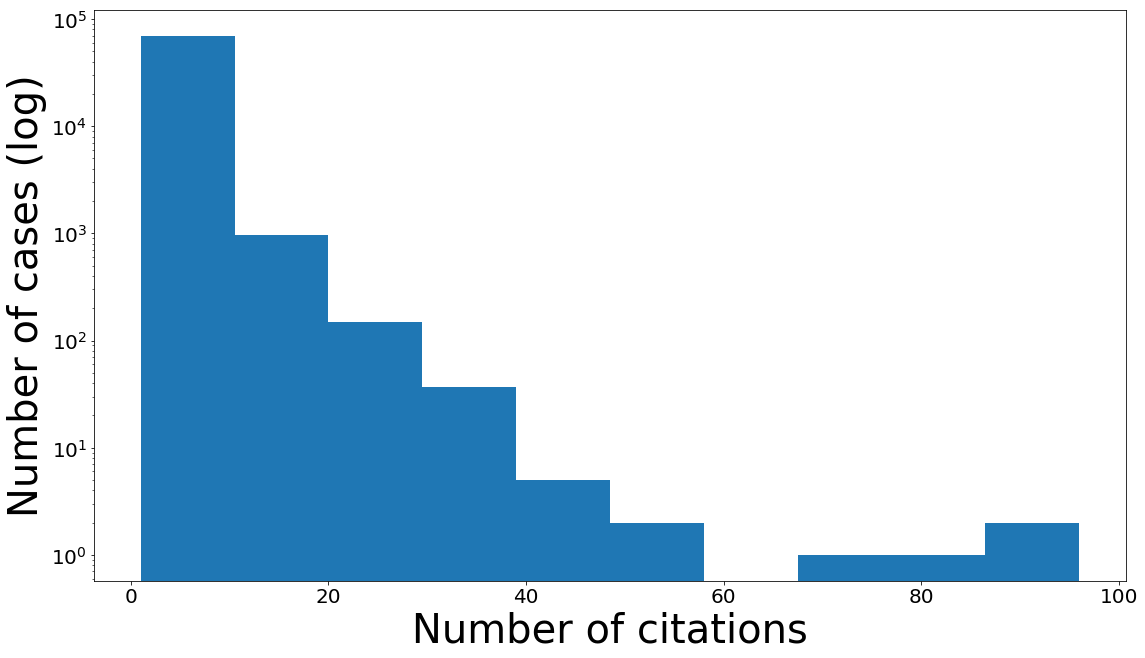

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
plt.hist(cited_df["citing_id"], log=True)
ax.set_yscale("log")
ax.set_xlabel("Number of citations", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of cases (log)", fontsize=YLABEL_FONT_SIZE)
plt.xticks(fontsize=X_TICK_FONT_SIZE, rotation=0)
plt.yticks(fontsize=Y_TICK_FONT_SIZE, rotation=0)

### General overview of how many cases a case cites

De data contains nearly 7,000 cases.

In [12]:
citing_df = df.groupby("citing_id").count()
citing_df["cited_id"].describe()

count    6819.000000
mean       23.620179
std        24.896425
min         1.000000
25%         8.000000
50%        16.000000
75%        31.000000
max       381.000000
Name: cited_id, dtype: float64

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 8 Text yticklabel objects>)

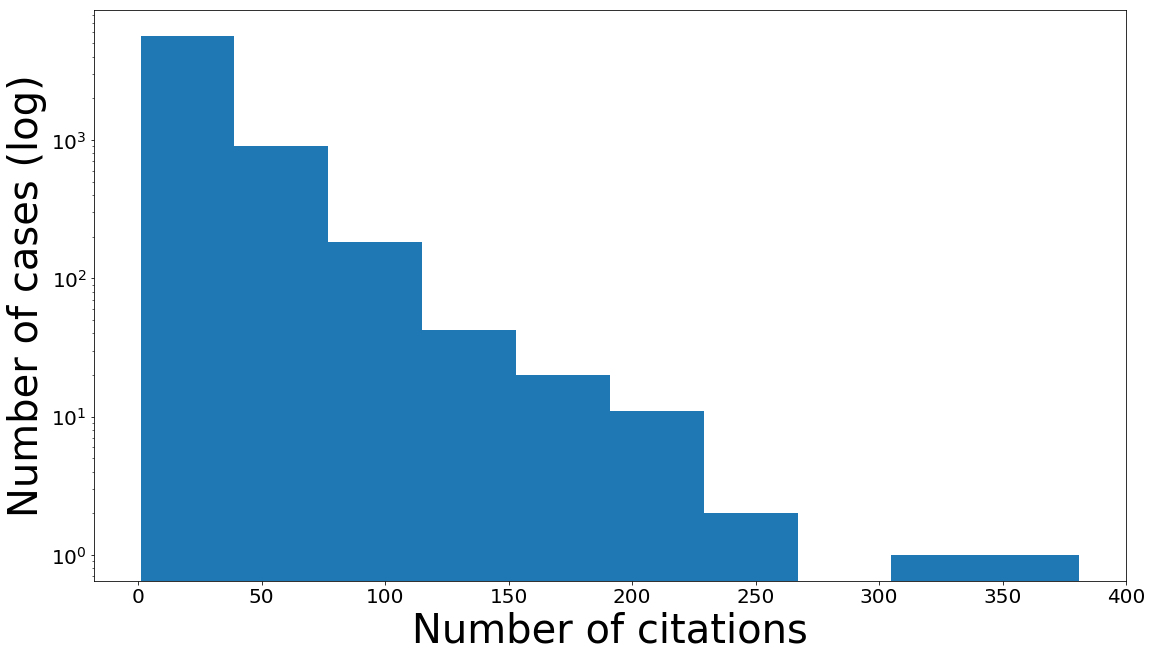

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
plt.hist(citing_df["cited_id"], log=True)
ax.set_yscale("log")
ax.set_xlabel("Number of citations", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of cases (log)", fontsize=YLABEL_FONT_SIZE)
plt.xticks(fontsize=X_TICK_FONT_SIZE, rotation=0)
plt.yticks(fontsize=Y_TICK_FONT_SIZE, rotation=0)

### Overview about majority opinion

Average majority opinion text length of the citing cases.

In [14]:
df_majority_citing = df.drop_duplicates("citing_id")
df_majority_citing["citing_word_count"].describe()

count     6819.000000
mean      4587.377621
std       4626.513043
min         56.000000
25%       1709.500000
50%       3445.000000
75%       5961.500000
max      61239.000000
Name: citing_word_count, dtype: float64

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 <a list of 8 Text yticklabel objects>)

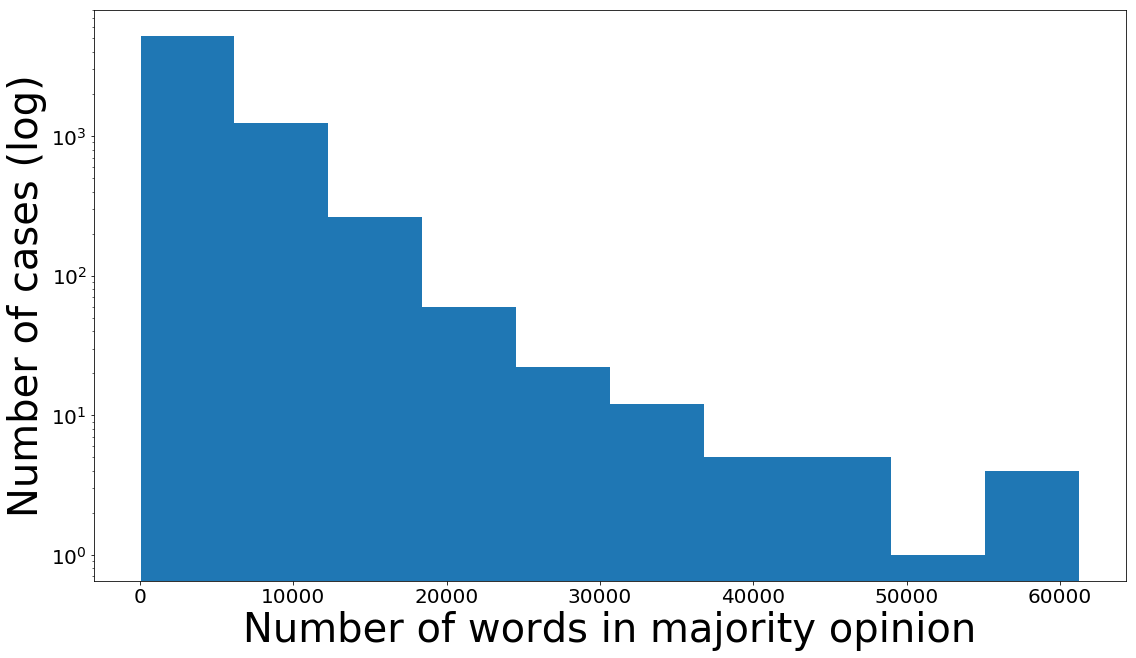

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
plt.hist(df_majority_citing["citing_word_count"], log=True)
ax.set_yscale("log")
ax.set_xlabel("Number of words in majority opinion", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of cases (log)", fontsize=YLABEL_FONT_SIZE)
plt.xticks(fontsize=X_TICK_FONT_SIZE, rotation=0)
plt.yticks(fontsize=Y_TICK_FONT_SIZE, rotation=0)


Average majority opinion text length of the cited cases.

In [18]:
df_majority_cited = df.drop_duplicates("cited_id")
df_majority_cited["cited_word_count"].describe()

count    70669.000000
mean      4371.110388
std       3649.097099
min         50.000000
25%       2069.000000
50%       3507.000000
75%       5586.000000
max      74829.000000
Name: cited_word_count, dtype: float64

(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
        1.e+07]), <a list of 9 Text yticklabel objects>)

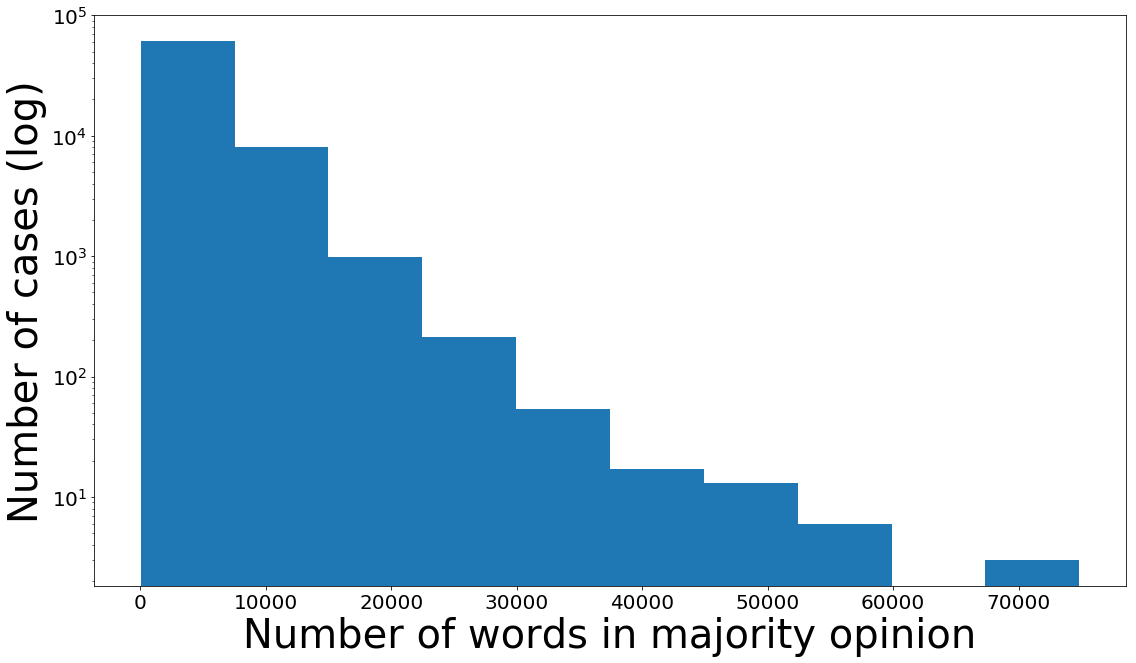

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
plt.hist(df_majority_cited["cited_word_count"], log=True)
ax.set_yscale("log")
ax.set_xlabel("Number of words in majority opinion", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of cases (log)", fontsize=YLABEL_FONT_SIZE)
plt.xticks(fontsize=X_TICK_FONT_SIZE, rotation=0)
plt.yticks(fontsize=Y_TICK_FONT_SIZE, rotation=0)

Here we look if there is a correlation between the number of citations and the length of the majority opinion.

In [21]:
cited_word_count = df.groupby(["cited_id", "cited_word_count"])["cited_id"].count().reset_index(name="count")

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text yticklabel objects>)

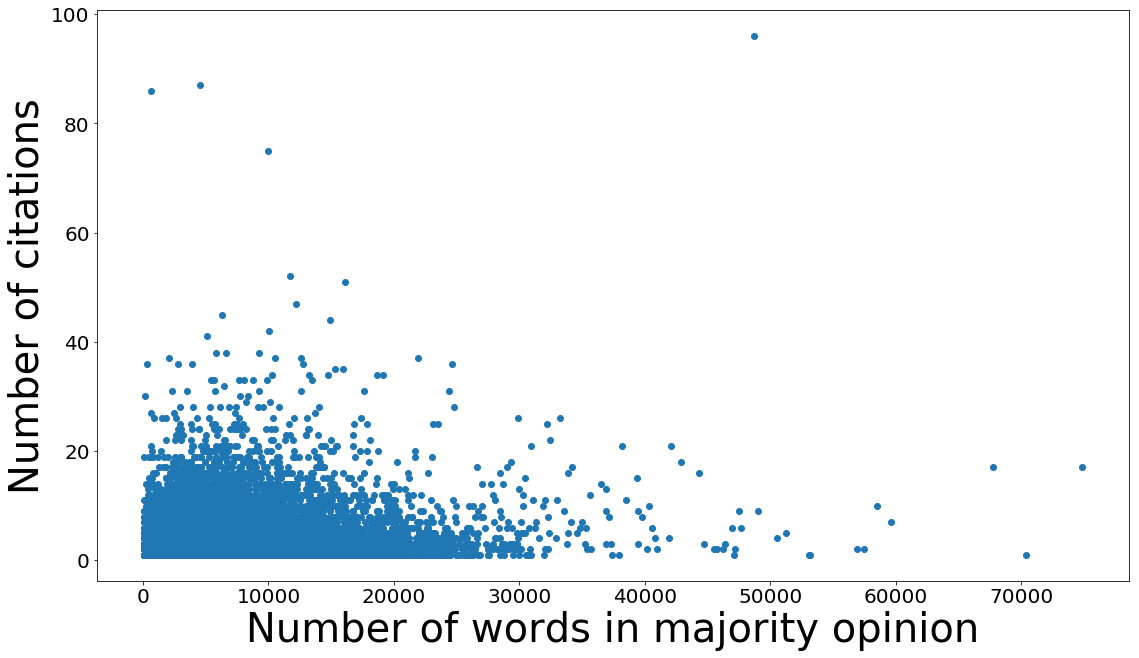

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
plt.scatter(x=cited_word_count["cited_word_count"], y=cited_word_count["count"])
ax.set_xlabel("Number of words in majority opinion", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of citations", fontsize=YLABEL_FONT_SIZE)
plt.xticks(fontsize=X_TICK_FONT_SIZE, rotation=0)
plt.yticks(fontsize=Y_TICK_FONT_SIZE, rotation=0)

Displas the five newest circuit cour cases in the database.

In [27]:
df['citing_date']  = pd.to_datetime(df['citing_date'])
df.sort_values("citing_date", ascending=False, na_position="last").head(5)

,citing_id,cited_id,citing_word_count,cited_word_count,citing_date
25835347,5PYB-0K31-F04K-N2N9-00000-00,3S4X-21C0-003B-G42T-00000-00,6364,4402.0,2017-11-13
41042692,5PYB-0K31-F04K-N2N9-00000-00,3RV0-0VB0-00B1-D4CJ-00000-00,6364,6820.0,2017-11-13
49363513,5PYB-0K31-F04K-N2N9-00000-00,5912-MW01-F04K-N000-00000-00,6364,8675.0,2017-11-13
45433581,5PYB-0K31-F04K-N2N9-00000-00,4F1C-2K20-0038-X1PS-00000-00,6364,2149.0,2017-11-13
50025352,5PYB-0K31-F04K-N2N9-00000-00,5P5J-T7T1-F04K-N2GT-00000-00,6364,2133.0,2017-11-13


Displays the sum of the number of cited cases per year.

In [28]:
df.sort_values("citing_date", ascending=True, na_position="last").head(5)

,citing_id,cited_id,citing_word_count,cited_word_count,citing_date
5591340,3S4X-2VK0-003B-J35M-00000-00,3S4X-3MG0-003B-J117-00000-00,969,2561.0,1882-08-01
50187133,3S4X-2FG0-003B-J193-00000-00,3S4X-2FT0-003B-J1F6-00000-00,3554,821.0,1884-11-17
50183436,3S4X-28C0-003B-J01Y-00000-00,3S4X-33H0-003B-J3PM-00000-00,2006,1604.0,1886-05-13
50191119,3S4X-22J0-003B-J42K-00000-00,3S4X-23H0-003B-J479-00000-00,2736,5671.0,1887-10-01
50188900,3S4X-22J0-003B-J42K-00000-00,3S4X-29N0-003B-J09Y-00000-00,2736,4103.0,1887-10-01


Displays the number of cases per year.

In [29]:
df_cases_year = df.groupby(df.citing_date.dt.year)["citing_date"].count()
print(df_cases_year)

citing_date
1882       1
1884       1
1886       1
1887       2
1892      13
1893      25
1894       1
1899       1
1900       1
1902       2
1903       4
1907       1
1909       7
1911       3
1915       5
1918       1
1919       7
1924       9
1926      26
1928      41
1929      21
1930      26
1931      53
1932      47
1933      93
1934     142
1935      32
1936      67
1937      35
1938      90
        ... 
1988    2434
1989    2071
1990    3107
1991    3590
1992    3682
1993    2932
1994    4071
1995    3614
1996    3220
1997    3045
1998    3195
1999    3114
2000    3469
2001    4195
2002    3989
2003    4833
2004    4213
2005    4519
2006    5439
2007    4872
2008    5176
2009    4990
2010    5537
2011    5511
2012    5093
2013    4516
2014    5279
2015    5850
2016    6311
2017    5804
Name: citing_date, Length: 109, dtype: int64


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text yticklabel objects>)

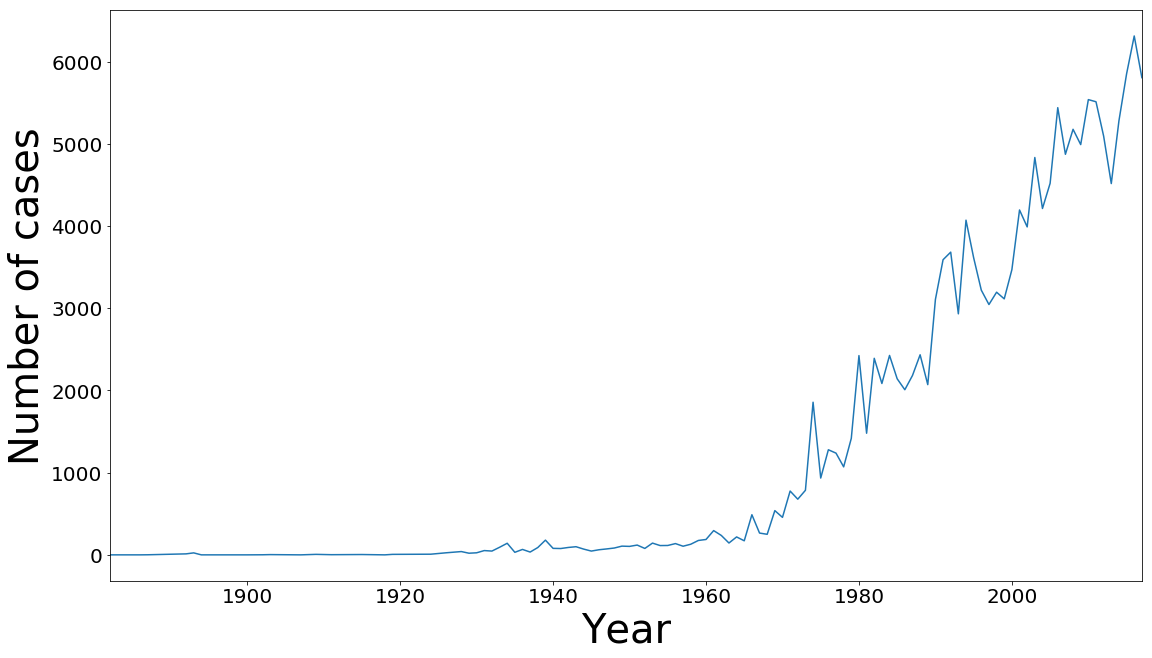

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
df_cases_year.plot(ax=ax)
ax.set_xlabel("Year", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of cases", fontsize=YLABEL_FONT_SIZE)
plt.xticks(fontsize=X_TICK_FONT_SIZE, rotation=0)
plt.yticks(fontsize=Y_TICK_FONT_SIZE, rotation=0)

Text(0, 0.5, 'Number of citations')

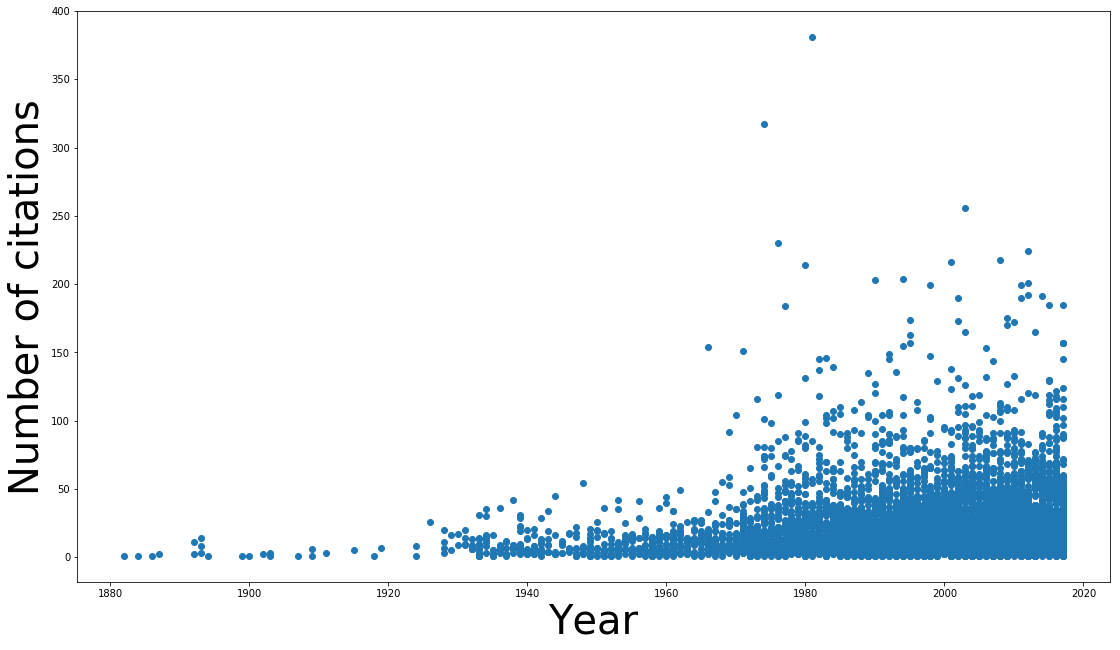

In [31]:
df_citations_per_year = df.groupby([df.citing_id, df.citing_date.dt.year])["citing_date"].count().reset_index(name="count")
fig, ax = plt.subplots()
fig.set_size_inches(XFIG_SIZE, YFIG_SIZE)
plt.scatter(x=df_citations_per_year.citing_date, y=df_citations_per_year["count"])
ax.set_xlabel("Year", fontsize=XLABEL_FONT_SIZE)
ax.set_ylabel("Number of citations", fontsize=YLABEL_FONT_SIZE)

In [46]:
unique_cases = {}
count = 0
with open("20190505_case_citation_network.csv", "r") as citation_network:
    for line in citation_network:
        row = line.split(",")
        try:
            unique_cases[row[2]]
        except:
            unique_cases[row[2]] = 1
        if count % 500000 == 0:
            print(count)
        count += 1
            

0
500000
1000000
1500000
2000000
2500000
3000000
3500000
4000000
4500000
5000000
5500000
6000000
6500000
7000000
7500000
8000000
8500000
9000000
9500000
10000000
10500000
11000000
11500000
12000000
12500000
13000000
13500000
14000000
14500000
15000000
15500000
16000000
16500000
17000000
17500000
18000000
18500000
19000000
19500000
20000000
20500000
21000000
21500000
22000000
22500000
23000000
23500000
24000000
24500000
25000000
25500000
26000000
26500000
27000000
27500000
28000000
28500000
29000000
29500000
30000000
30500000
31000000
31500000
32000000
32500000
33000000
33500000
34000000
34500000
35000000
35500000
36000000
36500000
37000000
37500000
38000000
38500000
39000000
39500000
40000000
40500000
41000000
41500000
42000000
42500000
43000000
43500000
44000000
44500000
45000000
45500000
46000000
46500000
47000000
47500000
48000000
48500000
49000000
49500000
50000000
50500000
51000000
51500000
52000000
52500000
53000000
53500000
54000000
54500000
55000000
55500000
56000000
56500000
5

In [48]:
len(unique_cases)

5156234